# Support Vector Machine

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC, LinearSVR, SVR

## SVC

### Prepare Dataset

In [2]:
data = pd.read_csv('./data/penguins_size.csv')

data = data.dropna()
data = data.drop(['sex', 'island', 'flipper_length_mm', 'body_mass_g'], axis=1)
data = data[data['species'] != 'Chinstrap']

X = data.drop(['species'], axis=1)

ss = StandardScaler()
X = ss.fit_transform(X) 

y = data['species']
spicies = {'Adelie': -1, 'Gentoo': 1}
y = [spicies[item] for item in y]
y = np.array(y) 

# Remove sample that is too close
X = np.delete(X, 182, axis=0)
y = np.delete(y, 182, axis=0)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

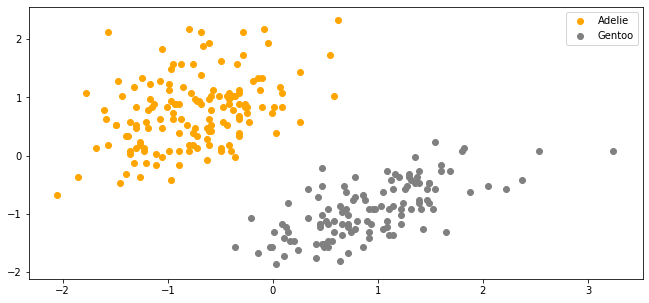

In [4]:
plt.figure(figsize=(11, 5))
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='orange', label='Adelie')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='gray', label='Gentoo')

plt.legend();

### Python Implementation

In [5]:
class MySVM():
    def __init__(self, number_of_features, learning_rate=0.001):
        self.w = np.zeros(number_of_features + 1)
        self.learning_rate = learning_rate
        pass
    
    def __extend_input(self, X):
        ones = np.ones((X.shape[0], 1))
        return np.concatenate((ones, X), axis=1)
    
    def fit(self, X_train, y_train, epochs):
        X_train = self.__extend_input(X_train)
        
        for epoch in range(1, epochs):
            eta = 1/(self.learning_rate * epoch)
            fac = (1 - (eta * self.learning_rate)) * self.w
            
            for i in range(1, X_train.shape[0]):  
                prediction = np.dot(X_train[i], self.w)

                if (y_train[i] * prediction) < 1 :
                    self.w = fac + eta * y_train[i] * X_train[i]            
                else:
                    self.w = fac

    
    def predict(self, X_test):
        X_test = self.__extend_input(X_test)
        predictions = []
        
        for x in X_test:
            prediction = np.dot(self.w, x)
            prediction = 1 if (prediction > 0) else -1
            predictions.append(prediction)
        return np.array(predictions)

In [6]:
model = MySVM(X_train.shape[1])
model.fit(X_train, y_train, 10000)

In [7]:
preditions = model.predict(X_test)
print(accuracy_score(preditions, y_test))

1.0


### Using SciKit Learn

In [8]:
lsvc_model = LinearSVC(C=1, loss="hinge")

lsvc_model.fit(X_train, y_train)

lsvc_preditions = lsvc_model.predict(X_test)
print(accuracy_score(lsvc_preditions, y_test))

1.0


### Using SciKit Learn Alternative

In [9]:
svc_model = SVC(kernel="linear", C=1)

svc_model.fit(X_train, y_train)

svc_preditions = svc_model.predict(X_test)
print(accuracy_score(svc_preditions, y_test))

1.0


In [10]:
pd.DataFrame({
    'Actual Value': y_test,
    'My SVM Predictions': preditions,
    'LinearSCV Predictions': lsvc_preditions,
    'SVC Predictions': svc_preditions,
})

,Actual Value,My SVM Predictions,LinearSCV Predictions,SVC Predictions
0,1,1,1,1
1,1,1,1,1
2,1,1,1,1
3,1,1,1,1
4,-1,-1,-1,-1
5,-1,-1,-1,-1
6,1,1,1,1
7,-1,-1,-1,-1
8,1,1,1,1
9,1,1,1,1


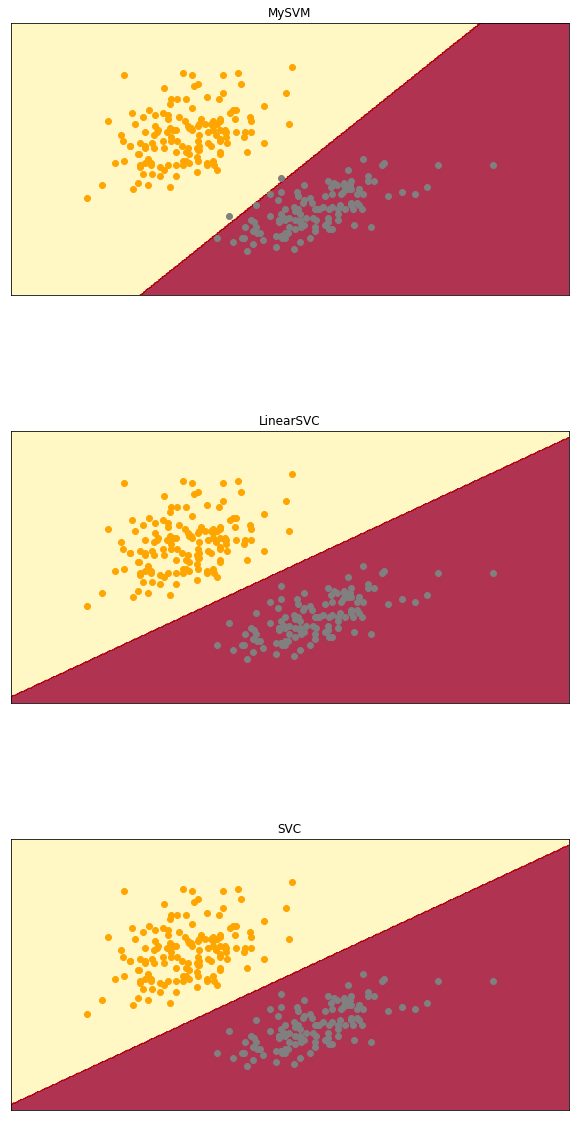

In [11]:
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

titles = ['MySVM',
          'LinearSVC',
          'SVC']

plt.figure(figsize=(10, 20))

for i, mdl in enumerate((model, lsvc_model, svc_model)):
    plt.subplot(3, 1, i + 1)
    plt.subplots_adjust(wspace=0.5, hspace=0.5)

    Z = mdl.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap='YlOrRd', alpha=0.8)

    plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='orange', label='Adelie')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='gray', label='Gentoo')
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

### Non - Linear & Kernel Trick

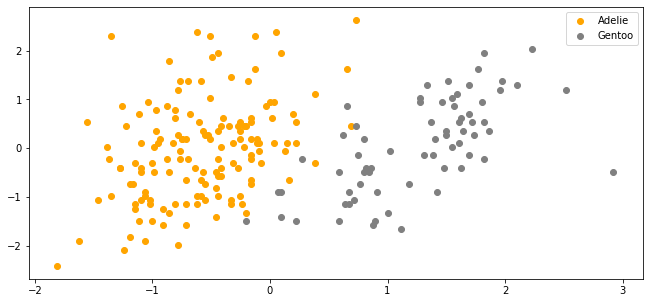

In [12]:

data = pd.read_csv('./data/penguins_size.csv')
data = data.dropna()
data = data.drop(['sex', 'island', 'flipper_length_mm', 'body_mass_g'], axis=1)
data = data[data['species'] != 'Gentoo']

X = data.drop(['species'], axis=1)

ss = StandardScaler()
X = ss.fit_transform(X) 

y = data['species']
spicies = {'Adelie': -1, 'Chinstrap': 1}
y = [spicies[item] for item in y]
y = np.array(y) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

plt.figure(figsize=(11, 5))
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='orange', label='Adelie')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='gray', label='Gentoo')

plt.legend();

In [13]:
svc_model_poly = SVC(kernel="poly", C=0.6)

svc_model_poly.fit(X_train, y_train)

svc_poly_preditions = svc_model_poly.predict(X_test)
print(accuracy_score(svc_poly_preditions, y_test))

0.8372093023255814


In [14]:
svc_model_rbf = SVC(kernel="rbf", gamma=.5, C=0.1)

svc_model_rbf.fit(X_train, y_train)

svc_rbf_preditions = svc_model_rbf.predict(X_test)
print(accuracy_score(svc_rbf_preditions, y_test))

0.9534883720930233


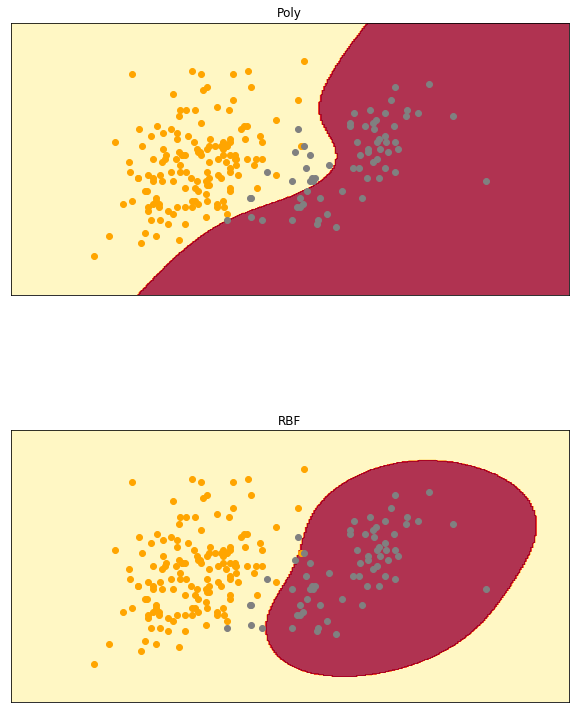

In [15]:
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

titles = ['Poly',
          'RBF']

plt.figure(figsize=(10, 20))

for i, mdl in enumerate((svc_model_poly, svc_model_rbf)):
    plt.subplot(3, 1, i + 1)
    plt.subplots_adjust(wspace=0.5, hspace=0.5)

    Z = mdl.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap='YlOrRd', alpha=0.8)

    plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='orange', label='Adelie')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='gray', label='Gentoo')
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

## SVR

### Prepare the data

In [16]:
data = pd.read_csv('./data/boston_housing.csv')
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


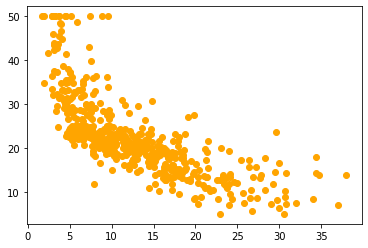

In [17]:
data = data.dropna()

X = data['lstat'].values
X = X.reshape(-1, 1)

y = data['medv'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

plt.scatter(x = X, y = y, color='orange')
plt.show()

### Linear SVR

In [18]:
lsvr_model = LinearSVR(epsilon=1.5, max_iter=10000)
lsvr_model.fit(X_train, y_train)

lsvr_predictions = lsvr_model.predict(X_test)

pd.DataFrame({
    'Actual Value': y_test,
    'LinearSVR Prediction': lsvr_predictions,
})

,Actual Value,LinearSVR Prediction
0,20.5,16.911952
1,5.6,10.651654
2,13.4,13.116115
3,12.6,17.967138
4,21.2,22.846488
...,...,...
97,25.0,22.662362
98,19.5,16.394982
99,19.9,18.073365
100,15.4,14.419164


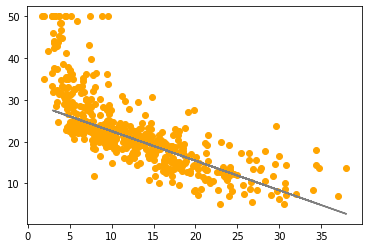

In [19]:
plt.scatter(x = X, y = y, color='orange')
plt.plot(X_test, lsvr_predictions, color='gray')
plt.show()

### Polinominal SVR

In [20]:
psvr_model = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
psvr_model.fit(X_train, y_train)

psvr_predictions = psvr_model.predict(X_test)

pd.DataFrame({
    'Actual Value': y_test,
    'LinearSVR Prediction': lsvr_predictions,
    'PolySVR Prediction': psvr_predictions
})

,Actual Value,LinearSVR Prediction,PolySVR Prediction
0,20.5,16.911952,17.943993
1,5.6,10.651654,9.078521
2,13.4,13.116115,12.987039
3,12.6,17.967138,19.092961
4,21.2,22.846488,23.110569
...,...,...,...
97,25.0,22.662362,22.997636
98,19.5,16.394982,17.344717
99,19.9,18.073365,19.203110
100,15.4,14.419164,14.833993


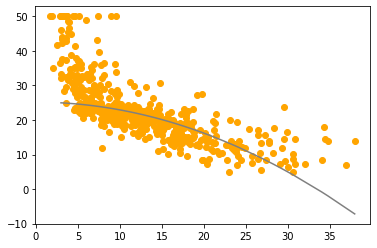

In [21]:
plt.scatter(x = X, y = y, color='orange')
values = np.column_stack((X_test, psvr_predictions))
values = values[values[:,0].argsort()]
plt.plot(values[:, 0], values[:, 1], color='gray')
plt.show()

### SVR with RBF Kernel

In [22]:
svr_rbf_model = SVR(C=100, gamma=0.1, epsilon=.1)
svr_rbf_model.fit(X_train, y_train)

svr_rbf_predictions = svr_rbf_model.predict(X_test)

pd.DataFrame({
    'Actual Value': y_test,
    'LinearSVR Predictions': lsvr_predictions,
    'PolySVR Predictions': psvr_predictions,
    'SVR RBF Predictions': svr_rbf_predictions
})

,Actual Value,LinearSVR Predictions,PolySVR Predictions,SVR RBF Predictions
0,20.5,16.911952,17.943993,15.764753
1,5.6,10.651654,9.078521,13.254520
2,13.4,13.116115,12.987039,12.341407
3,12.6,17.967138,19.092961,16.573468
4,21.2,22.846488,23.110569,22.173334
...,...,...,...,...
97,25.0,22.662362,22.997636,22.046692
98,19.5,16.394982,17.344717,15.350709
99,19.9,18.073365,19.203110,16.741805
100,15.4,14.419164,14.833993,12.914028


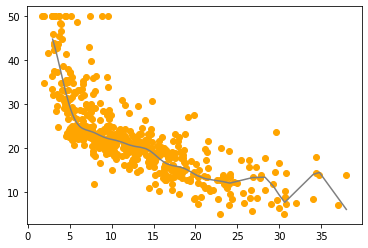

In [23]:
plt.scatter(x = X, y = y, color='orange')
values = np.column_stack((X_test,svr_rbf_predictions))
values = values[values[:,0].argsort()]
plt.plot(values[:,0], values[:,1], color='gray')
plt.show()